# More about time series

Astropy has a class called `TimeSeries` dedicated to representing time series.

We'll start by importing that, then read in more AAVSO data on DY Her and make a time series from it.

In [32]:
from astropy.coordinates import SkyCoord, EarthLocation
from astropy.table import Table
from astropy.timeseries import TimeSeries
from astropy.time import Time
from astropy import units as u

%matplotlib widget
from matplotlib import pyplot as plt

## More DY Her data -- all AAVSO data for DY Her in V band

We'll begin nearby reading this and plotting it.

In [23]:
dy_her_V = Table.read('aavsodata_dy_her_V_only.csv')

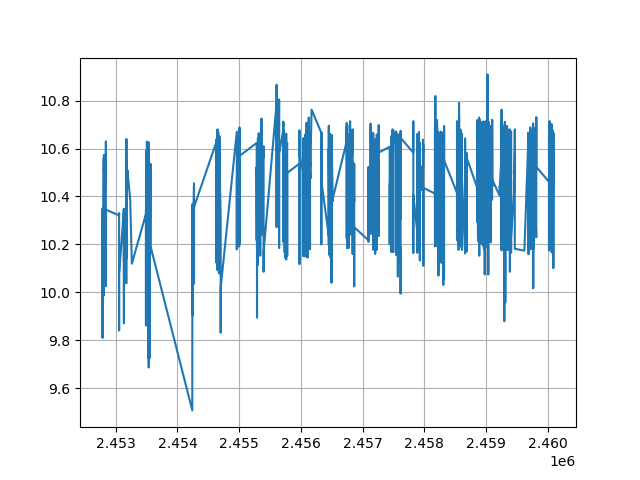

In [24]:
plt.figure()
plt.plot(dy_her_V['JD'], dy_her_V['Magnitude'])
plt.grid()

### Making a folded (phased) light curve

We begin by creating a time series. It is essentially a `Table` with a special `time` property.

It is often necessary to create a `Time` object first.

In [25]:
times = Time(dy_her_V['JD'], format='jd', scale='utc')
time_series = TimeSeries(time=times, data=dy_her_V)

In [26]:
time_series

time,JD,Magnitude,Uncertainty,HQuncertainty,Band,Observer Code,Comment Code(s),Comp Star 1,Comp Star 2,Charts,Comments,Transfomed,Airmass,Validation Flag,Cmag,Kmag,HJD,Star Name,Observer Affiliation,Measurement Method,Grouping Method,ADS Reference,Digitizer,Credit
Time,float64,float64,float64,float64,str1,str5,str1,str20,str20,str20,str168,int64,float64,str1,float64,float64,float64,str6,str7,str3,str5,int64,int64,int64
2452786.5922,2452786.5922,10.24,0.02,--,V,DKS,--,111,--,GSC,"""ERR: 0.02, COMP=GSC 968-1532""",--,--,V,--,--,--,DY HER,--,STD,--,--,--,--
2452786.5931,2452786.5931,10.25,0.02,--,V,DKS,--,111,--,GSC,"""ERR: 0.02, COMP=GSC 968-1532""",--,--,V,--,--,--,DY HER,--,STD,--,--,--,--
2452786.595,2452786.595,10.27,0.02,--,V,DKS,--,111,--,GSC,"""ERR: 0.02, COMP=GSC 968-1532""",--,--,V,--,--,--,DY HER,--,STD,--,--,--,--
2452786.5968,2452786.5968,10.24,0.02,--,V,DKS,--,111,--,GSC,"""ERR: 0.02, COMP=GSC 968-1532""",--,--,V,--,--,--,DY HER,--,STD,--,--,--,--
2452786.5978,2452786.5978,10.26,0.02,--,V,DKS,--,111,--,GSC,"""ERR: 0.02, COMP=GSC 968-1532""",--,--,V,--,--,--,DY HER,--,STD,--,--,--,--
2452786.5987,2452786.5987,10.26,0.02,--,V,DKS,--,111,--,GSC,"""ERR: 0.02, COMP=GSC 968-1532""",--,--,V,--,--,--,DY HER,--,STD,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460090.88933,2460090.88933,10.525,0.006,--,V,SAH,--,ENSEMBLE,--,2218LOH,--,0,--,Z,--,--,--,DY HER,AAVSO,STD,--,--,--,--
2460090.88991,2460090.88991,10.54,0.005,--,V,SAH,--,ENSEMBLE,--,2218LOH,--,0,--,Z,--,--,--,DY HER,AAVSO,STD,--,--,--,--


There is a fold method for creating a phased light curve. The period for this star from VSX is below.

In [27]:
period = 0.298427200000 * u.day

folded_dy_her = time_series.fold(period=period, normalize_phase=True)

This turns the `time` into a number from 0 to 1.

In [28]:
folded_dy_her.time

<Quantity [ 0.        ,  0.00301581,  0.00938252, ..., -0.01557944,
           -0.01363592, -0.01165889]>

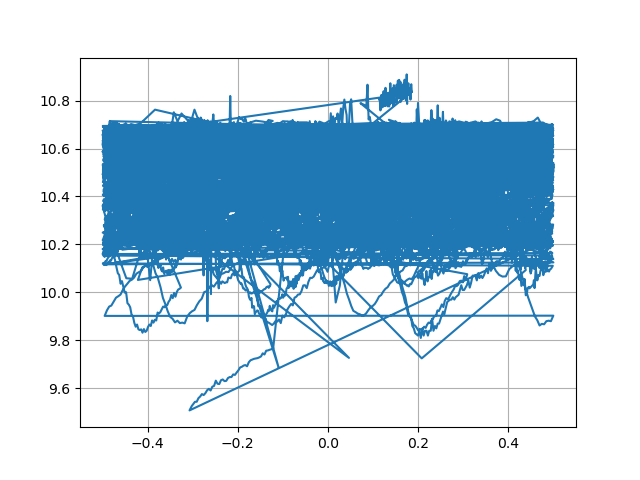

In [29]:
plt.figure()
plt.plot(folded_dy_her.time, folded_dy_her['Magnitude'])
plt.grid()

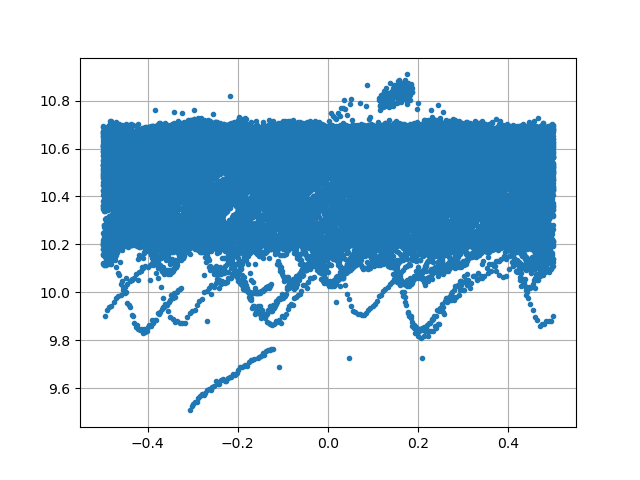

In [30]:
plt.figure()

# The "." below is shorthand for a marker that is a small dot

plt.plot(folded_dy_her.time, folded_dy_her['Magnitude'], '.')
plt.grid()

In [33]:
dy_her_coord = SkyCoord.from_name('dy her')

hjd = times.light_travel_time(dy_her_coord, kind='heliocentric', location=EarthLocation(lon=0, lat=0))

In [34]:
hjd = (times + hjd).utc

In [35]:
hjd

<Time object: scale='utc' format='jd' value=[2452786.59708131 2452786.59798131 2452786.5998813  ... 2460090.89652144
 2460090.89710144 2460090.89769144]>

In [43]:
recent = hjd.jd > 2460000

In [44]:
new_time_series = TimeSeries(time=hjd[recent], data=dy_her_V[recent])

In [45]:
new_folded_dy_her = new_time_series.fold(period=period, normalize_phase=True)

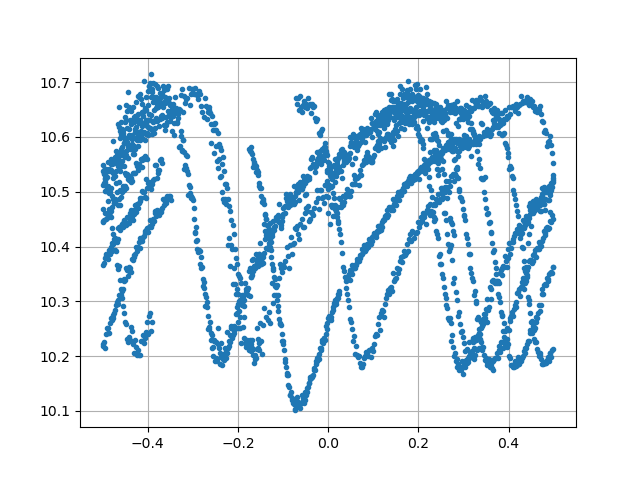

In [46]:
plt.figure()

# The "." below is shorthand for a marker that is a small dot

plt.plot(new_folded_dy_her.time, new_folded_dy_her['Magnitude'], '.')
plt.grid()